**Movie Genre Classification**
---

---

In [1]:
import pandas as pd
import numpy as np

1.Data Cleaning

In [2]:
df = pd.read_csv("train_data.txt", sep=' ::: ', engine='python', names=['Title', 'Genre', 'Description'], nrows=54214)
df.shape

(54214, 3)

In [3]:
df['Genre'].value_counts()

drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: Genre, dtype: int64

In [4]:
df['Genre_no']=df['Genre']

In [5]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Genre_no'] = label_encoder.fit_transform(df['Genre_no'])

In [6]:
df.tail()

,Title,Genre,Description,Genre_no
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,5
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,13
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",7
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,5
54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense h...",12


In [7]:
df.isnull().sum()

Title          0
Genre          0
Description    0
Genre_no       0
dtype: int64

In [9]:
#Removing duplicates
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(columns=['Title'],inplace=True)

In [12]:
df.tail()

,Genre,Description,Genre_no
54210,comedy,This short-lived NBC live sitcom centered on B...,5
54211,horror,The NEXT Generation of EXPLOITATION. The siste...,13
54212,documentary,"Ze bestaan echt, is a stand-up comedy about gr...",7
54213,comedy,Walter and Vivian live in the country and have...,5
54214,history,"On Labor Day Weekend, 1935, the most intense h...",12


2.EDA

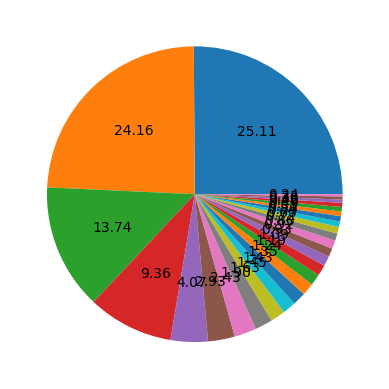

In [13]:
#Pie chart for the data
import matplotlib.pyplot as plt
plt.pie(df['Genre_no'].value_counts(),autopct="%0.2f")
plt.show()

In [14]:
import nltk

In [15]:
df['Num of chars'] = df['Description'].apply(len)

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['Num of words'] = df['Description'].apply(lambda x:len(x.split(' ')))

In [20]:
df['Num of sentences'] = df['Description'].apply(lambda x:len(x.split('.')))

In [22]:
df[['Num of chars','Num of words','Num of sentences']].describe()

,Num of chars,Num of words,Num of sentences
count,54214.000000,54214.000000,54214.000000
mean,599.452429,101.906426,6.167429
std,446.026620,76.579309,4.411019
min,41.000000,6.000000,1.000000
25%,324.000000,55.000000,4.000000
50%,463.000000,79.000000,5.000000
75%,712.000000,121.000000,7.000000
max,10503.000000,1829.000000,122.000000


In [23]:
import seaborn as sns

<ipython-input-24-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

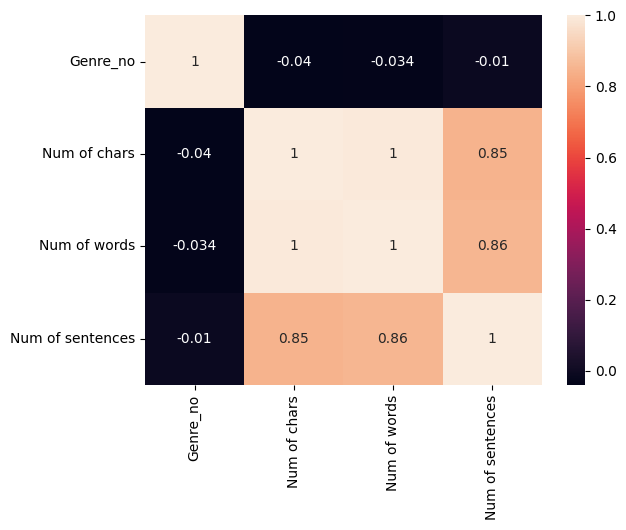

In [24]:
#Heatmap
sns.heatmap(df.corr(),annot=True)

3.Data Preprocessing

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string
def cleaning(text):
  #converting into lower case alphabets
  text = text.lower()
  #tokenization
  text = nltk.word_tokenize(text)
  #removing special characters
  q = [i for i in text if i.isalnum()]
  text = q
  #removing stop words
  q = [i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
  text = q
  #stemming
  q = [ps.stem(i) for i in text]
  return " ".join(q)

In [27]:
df['Cleaned description'] = df['Description'].apply(cleaning)

In [28]:
df.head()

,Genre,Description,Genre_no,Num of chars,Num of words,Num of sentences,Cleaned description
1,drama,Listening in to a conversation between his doc...,8,545,92,5,listen convers doctor parent oscar learn nobod...
2,thriller,A brother and sister with a past incestuous re...,24,183,32,3,brother sister past incestu relationship curre...
3,adult,As the bus empties the students for their fiel...,1,649,114,8,bu empti student field trip museum natur histo...
4,drama,To help their unemployed father make ends meet...,8,1081,192,10,help unemploy father make end meet edith twin ...
5,drama,The film's title refers not only to the un-rec...,8,624,106,4,film titl refer bodi ground zero also state na...


4.Model Building





In [29]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=5000)

In [30]:
X = tfidf.fit_transform(df['Cleaned description']).toarray()

In [31]:
X.shape

(54214, 5000)

In [32]:
y = df['Genre_no'].values

In [33]:
y.shape

(54214,)

In [34]:
#splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [36]:
#Gaussian Naive bayes algorithm
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_g = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_g))
print(precision_score(y_test,y_pred_g,average='weighted'))
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))

0.20686156967628885
0.3658133749465077
0.40384127642895024
0.20686156967628885


In [37]:
#Multinomial Naive bayes algorithm
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred_m = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_m))
print(precision_score(y_test,y_pred_m,average='weighted',labels=np.unique(y_pred_m)))
print(mnb.score(X_train,y_train))
print(mnb.score(X_test,y_test))

0.511389836761044
0.5540285728892825
0.5456872103479283
0.511389836761044


In [38]:
#Bernoulli Naive bayes algorithm
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_b = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_b))
print(precision_score(y_test,y_pred_b,average='weighted'))
print(bnb.score(X_train,y_train))
print(bnb.score(X_test,y_test))

0.5178456146822835
0.5394924025761568
0.5947753106914758
0.5178456146822835


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=2)

In [40]:
#Random forest classifier algorithm
rfc.fit(X_train,y_train)
y_pred_r = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_r))
print(precision_score(y_test,y_pred_r,average='weighted',labels=np.unique(y_pred_r)))
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))

0.48907129023333024
0.5487891653027513
0.9994466348481704
0.48907129023333024


In [41]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [42]:
#K Neighbours classifier algorithm
knc.fit(X_train,y_train)
y_pred_k = knc.predict(X_test)
print(accuracy_score(y_test,y_pred_k))
print(precision_score(y_test,y_pred_k,average='weighted'))

0.37978419256663287
0.36176056147365954


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [44]:
#Extra trees classifier
etc.fit(X_train,y_train)
y_pred_e = etc.predict(X_test)
print(accuracy_score(y_test,y_pred_e))
print(precision_score(y_test,y_pred_e,average='weighted',labels=np.unique(y_pred_e)))
print(etc.score(X_train,y_train))
print(etc.score(X_test,y_test))

0.4945125887669464
0.561409022466737
0.9994466348481704
0.4945125887669464


In [45]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)

In [47]:
#ADA boost classifier
abc.fit(X_train,y_train)
y_pred_a = abc.predict(X_test)
print(accuracy_score(y_test,y_pred_a))
print(precision_score(y_test,y_pred_a,average='weighted',labels=np.unique(y_pred_a)))

0.3371760582864521
0.35931570671065094


In [52]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=300)

In [53]:
#Logistic regression
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,y_pred_lg))
print(precision_score(y_test,y_pred_lg,average='weighted',labels=np.unique(y_pred_lg)))
print(lg.score(X_train,y_train))
print(lg.score(X_test,y_test))

0.5778843493498109
0.5654090977559105
0.6747135182495215
0.5778843493498109


**CONCLUSION:**
---
By obsserving the above results, we can conclude that Logistic regression is the suitable algorithm among all the other algorithms. Movie genre can be classified using this algorithm.